## K-means Clustering

### Introduction

The K-means algorithm is a unsupervised learning algorithm, which means that it groups unlabeled dataset into several different pre-defined clusters that are created in the process. 

- the "cluster centre" is the aritmatic mean of all the points that belong to that cluster
- each point is closer to its own cluster centre than to other cluster centres

K defines the number of pre-defined clusters that need to be created in the process, if K is determined to be ```K = 2``` that means that there will be 2 clusters that will be created.

We will generate a simple two-dimensional dataset to showcase how these clusters look 

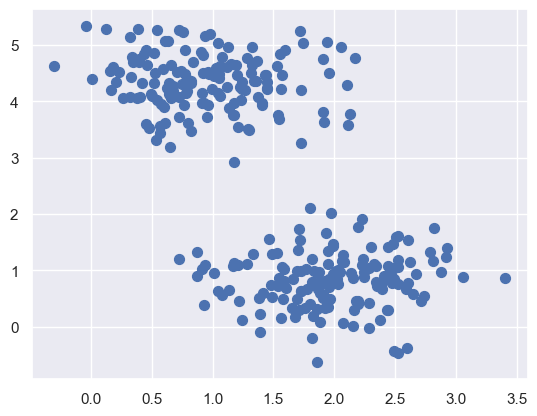

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
import numpy as np
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers= 2, cluster_std = 0.5, 
                       random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

Just by observing its really easy to see that there are 2 distinct "clusters". The k-means algorithm does this automaticlly.

In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init='auto')

kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Lets utilize the same visualization techniques we used earlier to show these labled clusters alongside showcasing where the centres are located

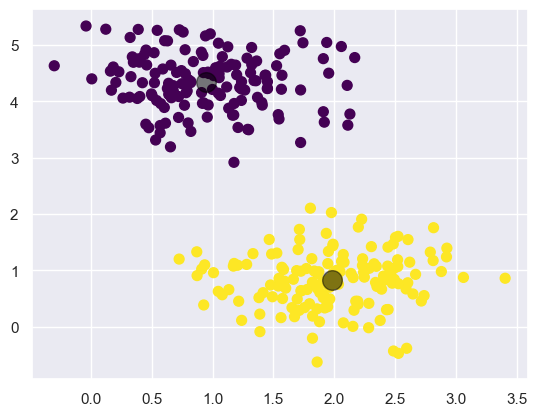

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap= 'viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s= 200, alpha= 0.5)

The observation to make here is that the k-menas algorithm assigns the points to clusters very similarly to how we might assign them by eye. The k-means algforithm does not utilize an exhaustive search appraoch but an intuitive iterative approach known as expectation-maximization.

### Understanding K-Means

K-means is a popular clustering algorithm that aims to partition a dataset into ```K``` distinct, non-overlapping clusters. As we mentioned before the algorithm chooses a centroid (mean of the clusters) to the closest data point. The overall objective tus to minimize variance within each cluster, making the data points within a cluster similar to each other while keeping the cluster non-overlapping.

#### Steps

1. Choose the Number of clusters (K): Before utilizing the algoruthm you (user) need to decide how many cluster you want to create. This is one of the most crucial steps to influence the overall quality of the clusters
2. Initial Centroid Selection: The algorithm starts by randomly selecting K data points as the inital centroids of the clusters
3. Assignment Step: Each data point in the dataset is assigned to the nearest centroid
4. Update Step: After all data points have been assigned, the centroids are recalculated based on the averages of each "cluster"
5. Iteration: Steps 3 and 4 are repeated until max iterations reached

### About the dataset we will be using

We will be using a very simple stock dataset. This dataset desribes the stock data for META, it includes columns such as Opening prices, closing prices, volume, highs, etc., Used for Segmentation, Customer Analytics, Clustering and More.

Lets read our dataset into the notebook.

In [11]:
import pandas as pd

dataframe = pd.read_csv("META.csv")


dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


#### 1. Figuring out what colums we want to utilize 

K-means algorithm does not work with non-numerical data, lucky for us a finance dataset is almost mostly numbers. Therefore, we have a wide variety of columns to choose from. To be simple lets pick 3 (Open, close, volume).

In [12]:
data = dataframe[['Open', 'High', 'Low', 'Close']].values
data

array([[171.940002, 173.309998, 170.270004, 173.210007],
       [173.089996, 173.490005, 170.800003, 170.949997],
       [172.399994, 173.889999, 172.199997, 173.509995],
       ...,
       [163.580002, 167.360001, 160.350006, 165.360001],
       [167.449997, 167.929993, 159.220001, 160.320007],
       [160.100006, 161.690002, 157.690002, 158.539993]])

Standardize the data

In [13]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataScaled = scaler.fit_transform(data)

#### Determining the number of clusters we want 

This is the most crucial step in our process. We will utilize the elbow method of determing the number of clusters. Let me demonstrate how this will look like.

/Users/papifrombucheon/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/papifrombucheon/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/papifrombucheon/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/papifrombucheon/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarni

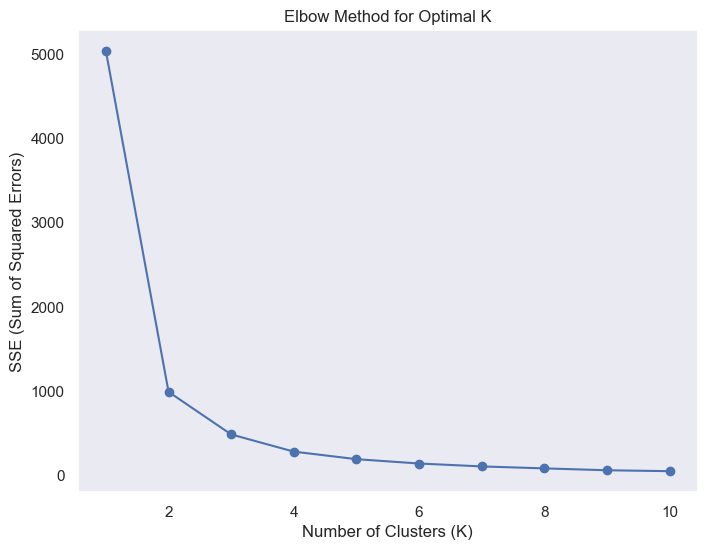

In [14]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(dataScaled)
    sse.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.grid()
plt.show()

The elbow looks to be right around the 2 area. However, it also does look like its between 2 and 3 so we will try both. Lets finally run the KMeans algorithm with our determined k value of 2 and 3.

/Users/papifrombucheon/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


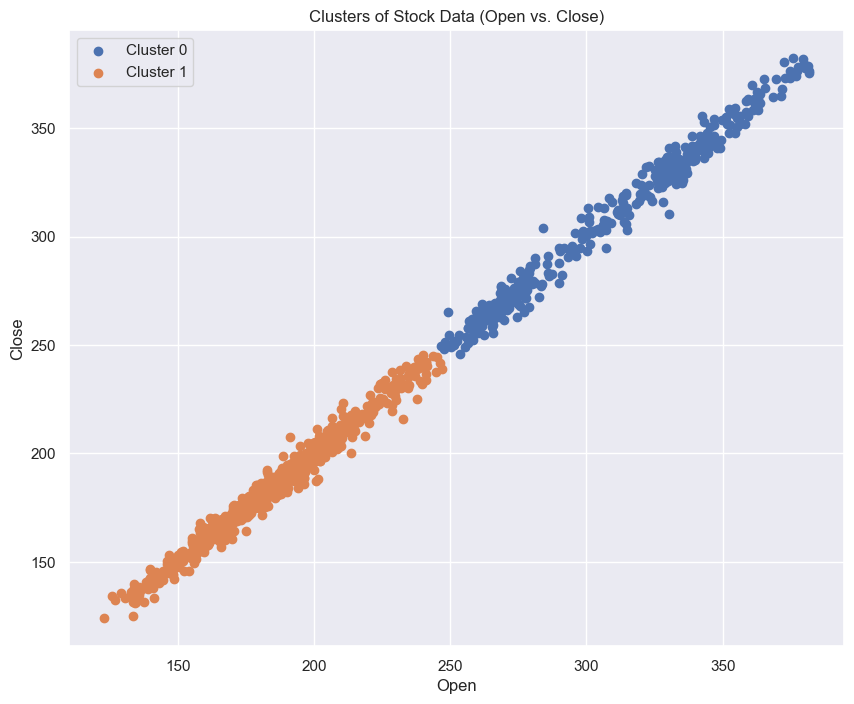

In [21]:
k = 2

kmeans = KMeans(n_clusters=2)
kmeans.fit(dataScaled)
# Add the cluster labels to the DataFrame
dataframe['Cluster'] = kmeans.labels_

# Visualize the clusters differently
plt.figure(figsize=(10, 8))

# Create scatter plot for all data points, color-coded by cluster
for cluster in range(k):
    cluster_data = dataframe[dataframe['Cluster'] == cluster]
    plt.scatter(cluster_data['Open'], cluster_data['Close'], label=f'Cluster {cluster}')

plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Clusters of Stock Data (Open vs. Close)')
plt.legend()
plt.grid(True)
plt.show()





### Lets mark the centroids on this graph 

Centroid Values Scaled
[[-0.5906264  -0.59175148 -0.58967648 -0.59012035]
 [ 1.35952585  1.36211562  1.3573393   1.35836101]]
Centroid Values Unscaled:
[[183.85053575 186.32388848 181.3749717  183.90930438]
 [307.10417328 311.09503932 303.20351687 307.09916047]]


/Users/papifrombucheon/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


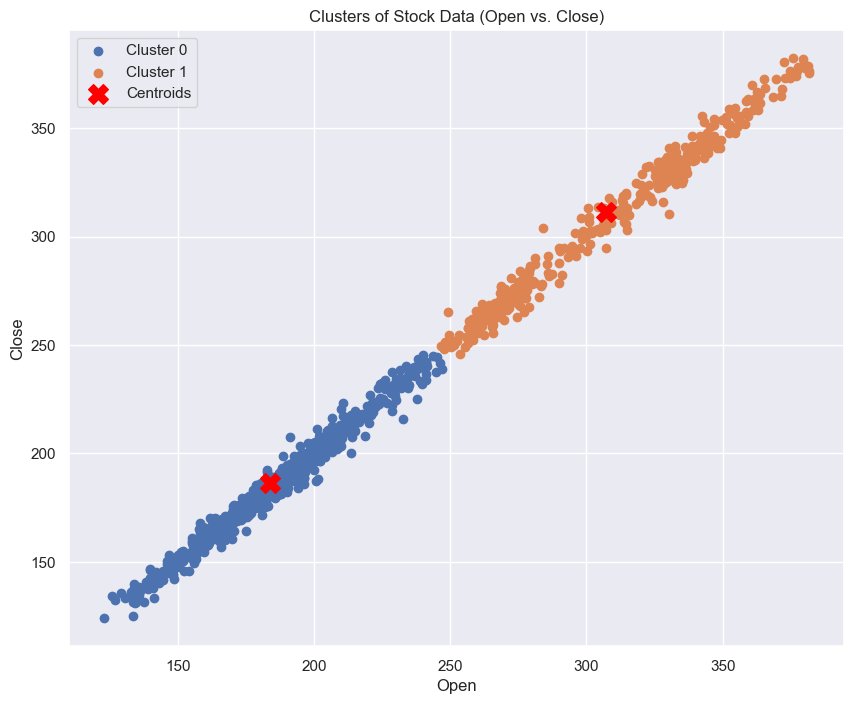

In [28]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(dataScaled)
# Add the cluster labels to the DataFrame
dataframe['Cluster'] = kmeans.labels_

# Fit the StandardScaler on your data
scaler = StandardScaler()
scaler.fit(data)

# Get cluster centroids
centroids = kmeans.cluster_centers_
centroids_original_scale = scaler.inverse_transform(centroids)

# Print the scaled centroid values
print("Centroid Values Scaled")
print(centroids)
# Print the centroid values
print("Centroid Values Unscaled:")
print(centroids_original_scale)

# Visualize the clusters differently
plt.figure(figsize=(10, 8))

# Create scatter plot for all data points, color-coded by cluster
for cluster in range(k):
    cluster_data = dataframe[dataframe['Cluster'] == cluster]
    plt.scatter(cluster_data['Open'], cluster_data['Close'], label=f'Cluster {cluster}')
    
plt.scatter(centroids_original_scale[:, 0], centroids_original_scale[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Clusters of Stock Data (Open vs. Close)')
plt.legend()
plt.grid(True)
plt.show()

We had to unscale our data using ```centroids_original_scale = scaler.inverse_transform(centroids)``` because when you standardize your data using StandardScaler, it transforms your data to have a mean of 0 and a standard deviation of 1 for each feature. The centroid values represent the centers of the clusters in this standardized space, where each feature has been scaled to have a mean of 0 and standard deviation of 1

Therefore, If you want to interpret the centroid values in the original scale, you should transform them back using the inverse transformation. However, the values may still look unusual because they reflect the mean values of the 'Open' and 'Close' columns in the standardized space.



### Your Turn

run the ```.describe()``` function on the dataset to see what kind of numerical columns there are to work with

In [29]:
dataframe.describe()

,Open,High,Low,Close,Adj Close,Volume,Cluster
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000
mean,221.179340,224.112289,218.272170,221.218792,221.218792,2.245619e+07,0.302862
std,63.227194,63.883962,62.596820,63.248667,63.248667,1.445829e+07,0.459679
min,123.099998,129.740005,123.019997,124.059998,124.059998,6.046300e+06,0.000000
25%,175.350002,177.247498,173.067498,175.285003,175.285003,1.418762e+07,0.000000
50%,194.720001,197.394996,192.169998,194.595001,194.595001,1.888235e+07,0.000000
75%,267.930008,270.452499,263.959999,266.937508,266.937508,2.601525e+07,1.000000
max,381.679993,384.329987,378.809998,382.179993,382.179993,1.881199e+08,1.000000


Your task is to follow the same 4 step process as outlined above

1. Firstly, what amount of columns you want to utilize for the clustering.

In [30]:
data = dataframe[['Open', 'Close', 'Volume', 'Adj Close']]
data

,Open,Close,Volume,Adj Close
0,171.940002,173.210007,18049500,173.210007
1,173.089996,170.949997,10998500,170.949997
2,172.399994,173.509995,12372000,173.509995
3,173.759995,172.960007,11186300,172.960007
4,173.009995,173.050003,9119300,173.050003
...,...,...,...,...
1253,160.350006,157.160004,19567900,157.160004
1254,167.070007,162.929993,40953000,162.929993
1255,163.580002,165.360001,30145700,165.360001
1256,167.449997,160.320007,22609100,160.320007


2. Utilize the elbow method again to determine what 'k' value will be utilized

3. Perform the actual clustering, using the k-value that you determine from step 2